In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
def plot_predictions(train_X, train_y, test_X, test_y, predictions=None):
  plt.scatter(train_X, train_y, c='b', label='Training data')
  plt.scatter(test_X, test_y, c='g', label='Testing data')
  if predictions is not None:
    plt.scatter(test_X, predictions, c='r', label='Predictions')
  plt.legend()
  plt.show()


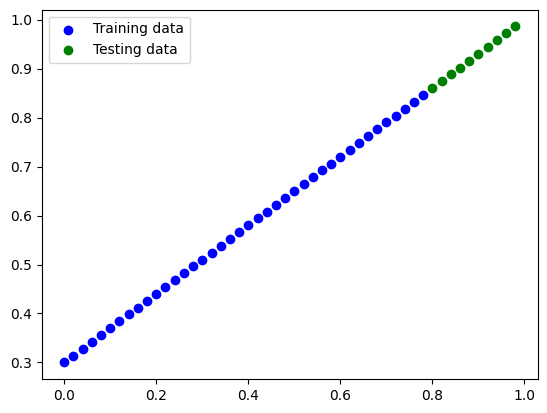

In [ ]:
train_X, train_y, test_X, test_y = X[:40], y[:40], X[40:], y[40:]
plot_predictions(train_X, train_y, test_X, test_y)

In [ ]:
class LinearTestModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = torch.nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear(x)

In [ ]:
model_0 = LinearTestModel()
model_0.parameters()

<generator object Module.parameters at 0x7fc92de0e420>

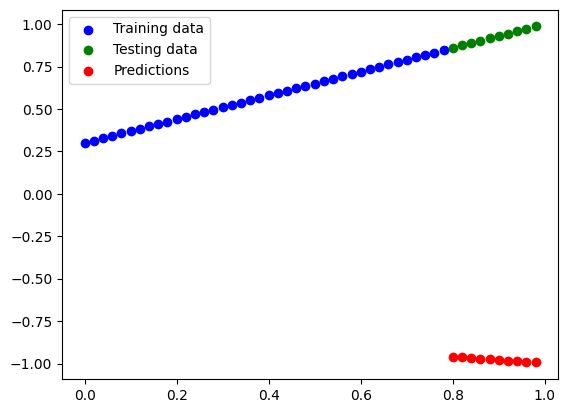

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(test_X)

plot_predictions(train_X, train_y, test_X, test_y, y_preds)

In [ ]:
num_epocs = 1000
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(num_epocs):
  model_0.train()
  y_pred = model_0(train_X)
  loss = loss_fn(y_pred, train_y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(test_X)
    test_loss = loss_fn(test_pred, test_y)
    train_loss = loss_fn(y_pred, train_y)
    if epoch % 10 == 0:
          epoch_count.append(epoch)
          train_loss_values.append(loss.detach().numpy())
          test_loss_values.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 1.453002691268921 | MAE Test Loss: 1.8859584331512451 
Epoch: 10 | MAE Train Loss: 1.3377927541732788 | MAE Test Loss: 1.7512485980987549 
Epoch: 20 | MAE Train Loss: 1.2225829362869263 | MAE Test Loss: 1.616538405418396 
Epoch: 30 | MAE Train Loss: 1.1073729991912842 | MAE Test Loss: 1.4818286895751953 
Epoch: 40 | MAE Train Loss: 0.9921631813049316 | MAE Test Loss: 1.3471187353134155 
Epoch: 50 | MAE Train Loss: 0.8769532442092896 | MAE Test Loss: 1.2124089002609253 
Epoch: 60 | MAE Train Loss: 0.7617431879043579 | MAE Test Loss: 1.0776989459991455 
Epoch: 70 | MAE Train Loss: 0.646533191204071 | MAE Test Loss: 0.9429888725280762 
Epoch: 80 | MAE Train Loss: 0.5313231945037842 | MAE Test Loss: 0.8082789182662964 
Epoch: 90 | MAE Train Loss: 0.4161132276058197 | MAE Test Loss: 0.673568844795227 
Epoch: 100 | MAE Train Loss: 0.3009031414985657 | MAE Test Loss: 0.5388587713241577 
Epoch: 110 | MAE Train Loss: 0.18569312989711761 | MAE Test Loss: 0.404148757457

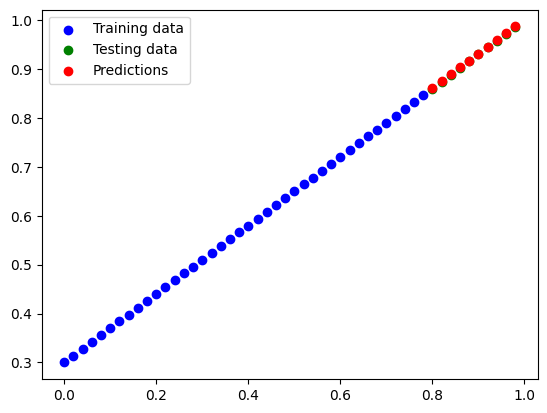

In [ ]:
model_0.eval()
with torch.inference_mode():
  test_pred = model_0(test_X)
plot_predictions(train_X, train_y, test_X, test_y, test_pred)

In [ ]:
model_0.state_dict()